In [198]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#ignore python warnings
warnings.filterwarnings('ignore')

In [199]:
#Read data from excel worksheets
df_Kayaking =pd.read_excel("V02Max_Combined.xlsx",sheet_name="Kayaking")
df_Athletes=pd.read_excel("V02Max_Combined.xlsx",sheet_name="Athletes")
df_Triathlon=pd.read_excel("V02Max_Combined.xlsx",sheet_name="Triathlon")
df_Fencing=pd.read_excel("V02Max_Combined.xlsx",sheet_name="Fencing")

In [200]:
#concatenate all sports data to form a single dataframe
df_data = pd.concat([df_Fencing,df_Kayaking,df_Triathlon],ignore_index=True)

Q1.Can we predict VO2max based on Age and Ethnicity?
   

 VO2Max=A higher VO₂max is generally associated with a greater 
capacity for sustained exercise and is a predictor of endurance performance
in activities like running, cycling, and swimming.

In [201]:

df_data_copy=df_data.copy()
df_Sum_VO2=df_data_copy.groupby('ID')['VO2'].sum().reset_index()

df_merge_VO2=pd.merge(df_Athletes, df_Sum_VO2[['ID', 'VO2']], on='ID')

df_merge_VO2['VO2max']=df_merge_VO2['VO2']/df_merge_VO2['Weight']


threshold=df_merge_VO2['VO2max'].median()

df_merge_VO2['VO2max_Binary'] = df_merge_VO2['VO2max'].apply(lambda x: 1 if x > threshold else 0)

gender_mapping = {'Male': 0, 'Female': 1}
ethnicity_mapping = {'African': 0, 'Asian': 1, 'White': 2, 'Latino': 3}  # Adjust as needed


df_merge_VO2['Gender_binary'] = df_merge_VO2['Gender'].map(gender_mapping)
df_merge_VO2['Ethnicity_numeric'] = df_merge_VO2['Ethnicity'].map(ethnicity_mapping)



In [202]:
X = df_merge_VO2[['age','Ethnicity_numeric']].values
y = df_merge_VO2.iloc[:,-1].values

#Including Logistic Regression 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
X_train.shape, X_test.shape
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_std, y_train)
print(f'The accuracy score in Logistic Regression is {log_reg.score(X_test_std, y_test)}')

#We can try using other different Algorithms and Try to get into a better Accuracy score for the same Attributes 
#or add more attributes to increase the accuracy score for the model


The accuracy score in Logistic Regression is 0.5


In [219]:
df_merge_VO2

,ID,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,VO2,VO2max,VO2max_Binary,Gender_binary,Ethnicity_numeric
0,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,2298.775092,42.807730,0,1,0
1,2,15,56.2,162,80,127,fencing,Male,African,Ethan,Reynolds,2171.152256,38.632602,0,0,0
2,3,16,89.9,191,155,300,fencing,Male,White,Jackson,Harper,6266.538536,69.705657,1,0,2
3,4,16,76.5,180,215,275,fencing,Male,White,Liam,Sanchez,5889.725663,76.989878,1,0,2
4,5,17,76.4,186,110,172,fencing,Female,White,Ava,Thompson,6627.133058,86.742579,1,1,2
5,6,17,65.6,169,131,186,fencing,Female,White,Sophia,Rodriguez,4702.172897,71.679465,1,1,2
6,7,15,49.8,165,65,108,fencing,Female,White,Grace,Simmons,1912.518617,38.403988,0,1,2
7,8,15,51.2,165,80,133,fencing,Female,White,Aiden,Bennett,2294.891090,44.822092,0,1,2
8,9,14,57.1,176,50,125,fencing,Female,African,Chloe,Price,2837.718226,49.697342,0,1,0
9,10,14,58.8,177,101,162,fencing,Female,African,Lily,Jordan,3241.183654,55.122171,0,1,0


Q2.Compare HRV across Ethnicity using Bar Chart 

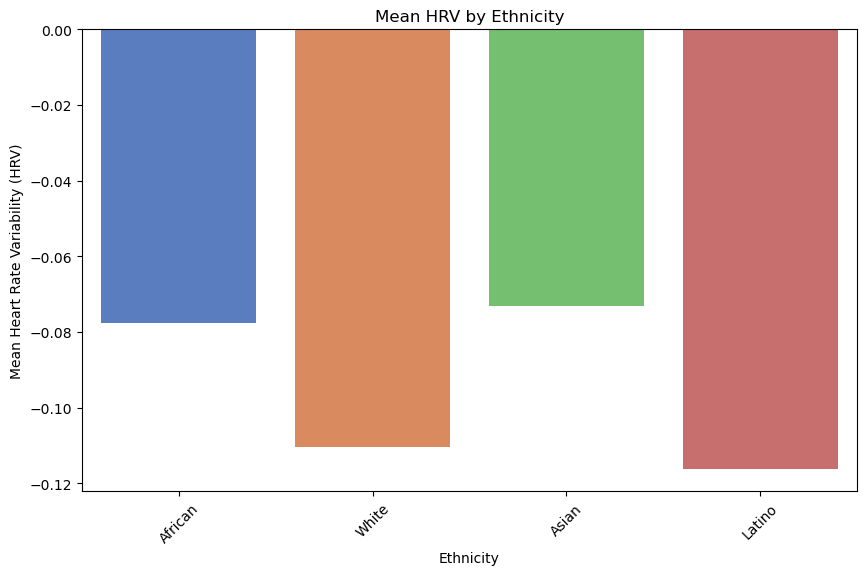

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot with HRV and Ethnicity
sns.barplot(x='Ethnicity', y='HRV', data=df_final, ci=None, palette='muted')


plt.xlabel('Ethnicity')
plt.ylabel('Mean Heart Rate Variability (HRV)')
plt.title('Mean HRV by Ethnicity')


plt.xticks(rotation=45)

# Show the plot
plt.show()


In [204]:
df_merge_VO2

,ID,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,VO2,VO2max,VO2max_Binary,Gender_binary,Ethnicity_numeric
0,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,2298.775092,42.807730,0,1,0
1,2,15,56.2,162,80,127,fencing,Male,African,Ethan,Reynolds,2171.152256,38.632602,0,0,0
2,3,16,89.9,191,155,300,fencing,Male,White,Jackson,Harper,6266.538536,69.705657,1,0,2
3,4,16,76.5,180,215,275,fencing,Male,White,Liam,Sanchez,5889.725663,76.989878,1,0,2
4,5,17,76.4,186,110,172,fencing,Female,White,Ava,Thompson,6627.133058,86.742579,1,1,2
5,6,17,65.6,169,131,186,fencing,Female,White,Sophia,Rodriguez,4702.172897,71.679465,1,1,2
6,7,15,49.8,165,65,108,fencing,Female,White,Grace,Simmons,1912.518617,38.403988,0,1,2
7,8,15,51.2,165,80,133,fencing,Female,White,Aiden,Bennett,2294.891090,44.822092,0,1,2
8,9,14,57.1,176,50,125,fencing,Female,African,Chloe,Price,2837.718226,49.697342,0,1,0
9,10,14,58.8,177,101,162,fencing,Female,African,Lily,Jordan,3241.183654,55.122171,0,1,0


Q3.Show Gender Distribution across sports

Gender     Female  Male
sport                  
fencing         7     3
kayak           3     3
triathlon       0     2


<Figure size 1000x600 with 0 Axes>

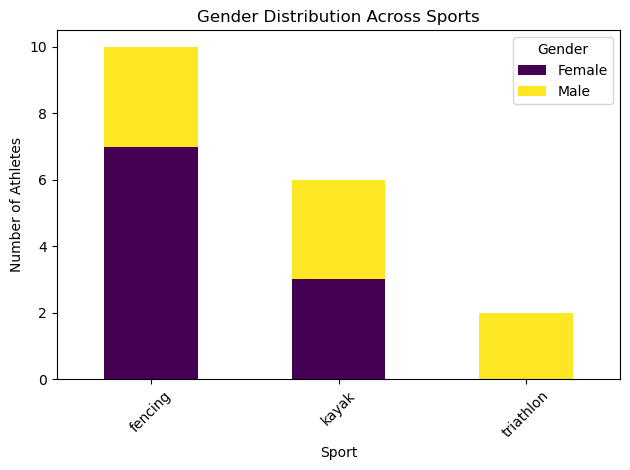

In [205]:
# Gender Distribution across the sports
gender_distribution = df_merge_VO2.groupby(['sport', 'Gender']).size().unstack(fill_value=0)
print(gender_distribution)
import matplotlib.pyplot as plt
import seaborn as sns

# Creating bar chart
plt.figure(figsize=(10, 6))
gender_distribution.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Gender Distribution Across Sports')
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Q4.Show Distribution of Athletes based on Ethnicity across the sports 

In [214]:
import plotly.express as px
import pandas as pd


df_distribution = df_merge_VO2[['sport', 'Ethnicity']].value_counts().reset_index(name='count')

# Create a sunburst chart
fig = px.sunburst(df_distribution, 
                  path=['sport', 'Ethnicity'], 
                  values='count', 
                  color='count', 
                  color_continuous_scale='viridis', 
                  title='Race Distribution Across Sports')


fig.show()


In [ ]:
Q5.Compare HRV across age using Bar Chart 

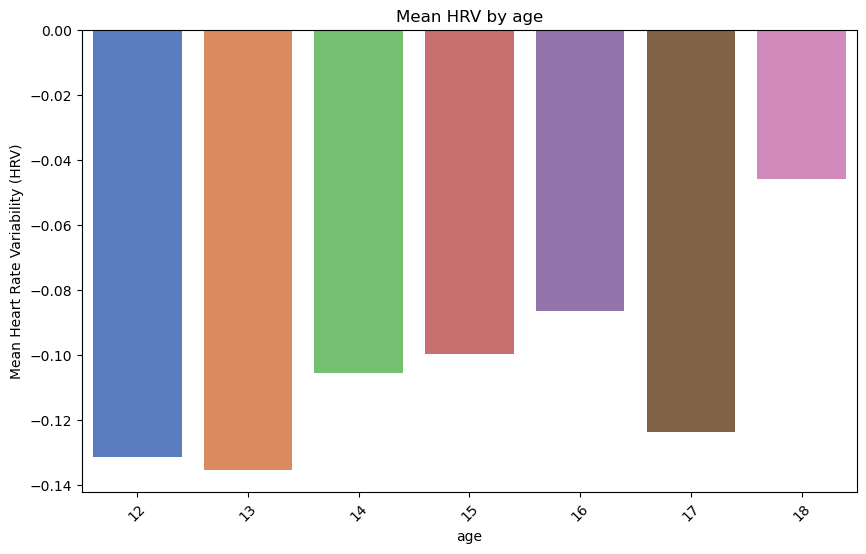

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))

#Bar plot
sns.barplot(x='age', y='HRV', data=df_final, ci=None, palette='muted')


plt.xlabel('age')
plt.ylabel('Mean Heart Rate Variability (HRV)')
plt.title('Mean HRV by age')


plt.xticks(rotation=45)


plt.show()


Q6.What is the Corelation Coefficient for Age and  Vo2 max 

In [208]:
correlation = df_merge_VO2['age'].corr(df_merge_VO2['VO2max'])
print(f'The correlation between age and VO2max is {correlation:.2f}')

The correlation between age and VO2max is 0.44


Q7.Show Correlation between HR and VO2

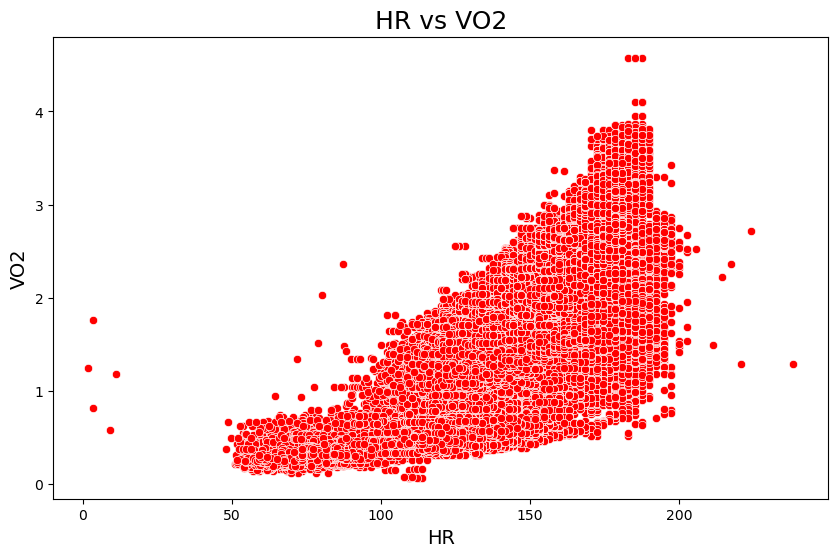

correlation between HR and VO2 is 0.7


In [216]:
df_data_copy=df_data.copy()

#Calculating HeartRate 
df_data_copy['HR']=60/(df_data_copy['RR']/1000)

plt.figure(figsize = (10,6))
#Using Scatter plot

sns.scatterplot(x='HR',y='VO2',color='r',data=df_data_copy)
plt.title('HR vs VO2',size=18)
plt.xlabel('HR',size=14)
plt.ylabel('VO2',size=14)
plt.show()

print('correlation between HR and VO2 is {}'.format(round(df_data_copy.corr()['HR']['VO2'],3)))

Q8.Show the counts of Races across the Dataset

In [217]:
df_Athletes['Ethnicity'].value_counts()

Ethnicity
African    6
White      6
Latino     4
Asian      2
Name: count, dtype: int64

Q9.Athletes from which sport had the Least average cardiorespiratory fitness in terms of HRV?

In [220]:
df_data_copy["HRV"]= df_data_copy.groupby("ID")["RR"].diff()
df_data_copy=pd.merge(df_data_copy,df_Athletes[['ID','sport']],on='ID',how='inner')
low_HRV_sport=df_data_copy.groupby("sport")["HRV"].mean().sort_values(ascending=True).head(1)

print(f'The Athletes from {low_HRV_sport} had the least Cardiorespiratory fitness in terms of HRV')

The Athletes from sport
triathlon   -0.13122
Name: HRV, dtype: float64 had the least Cardiorespiratory fitness in terms of HRV


Q10.Which Attributes are most important for classifying the target variable VO2max 

Accuracy on test data: 0.75


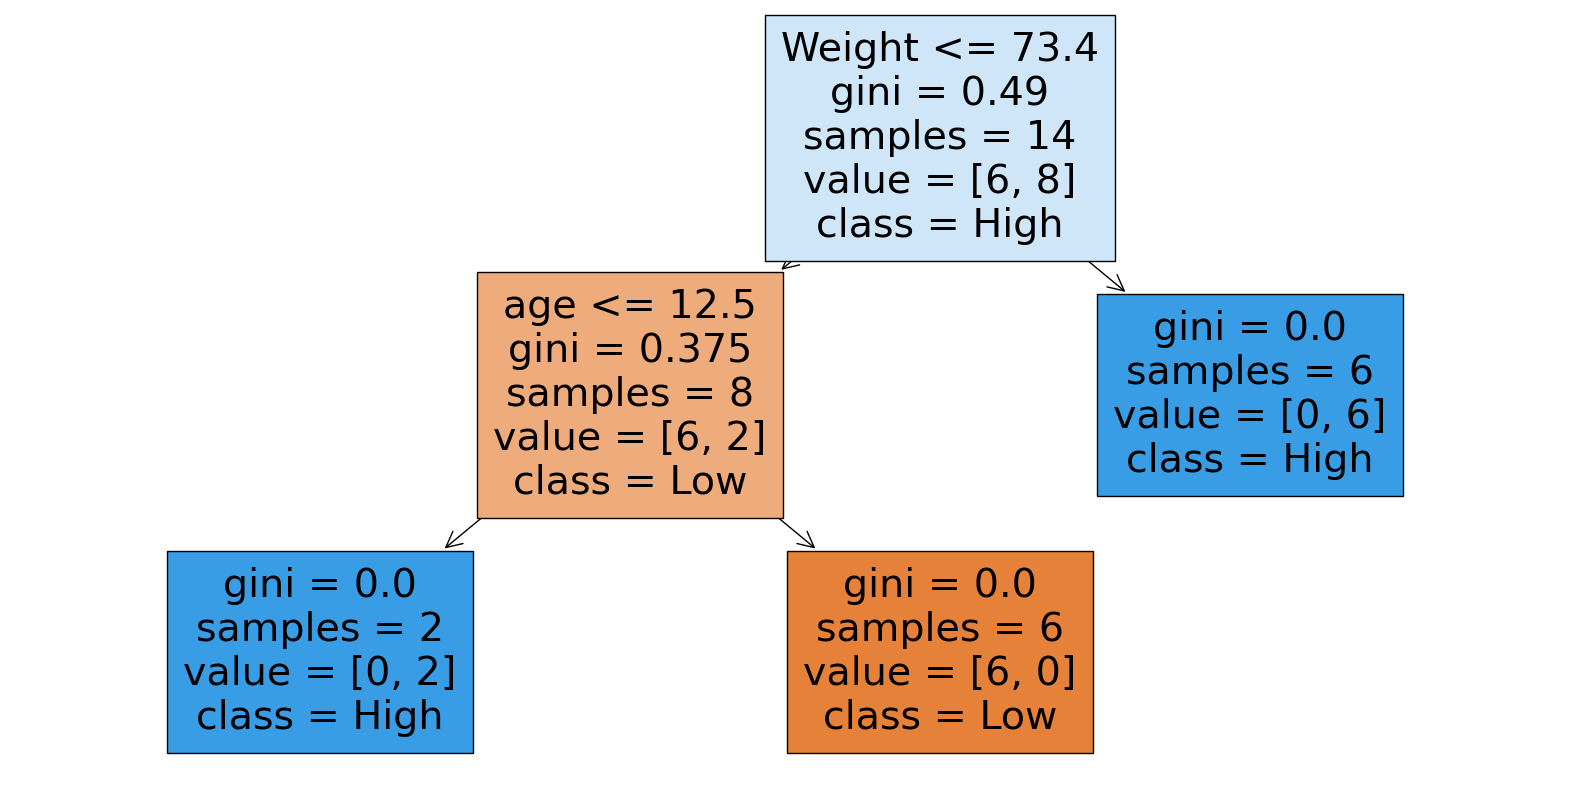

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt


features = ['age', 'Weight', 'Height', 'P_vt1', 'P_vt2', 'Gender_binary']  
target = 'VO2max_Binary'

# Setting the features and target variables
X = df_merge_VO2[features]
y = df_merge_VO2[target]

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
d_tree = DecisionTreeClassifier(random_state=42)
d_tree.fit(X_train, y_train)

# Evaluate the model
score = d_tree.score(X_test, y_test)
print(f"Accuracy on test data: {score:.2f}")

# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(d_tree,
               feature_names=features,
               class_names=['Low', 'High'], 
               filled=True)
plt.show()


In [221]:
df_data_copy

,ID,time,RR,VO2,power,HR,HRV,sport
0,1,-130.840,672.0,0.302008,0,89.285714,NaN,fencing
1,1,-130.168,672.0,0.302008,0,89.285714,0.0,fencing
2,1,-129.536,632.0,0.301336,0,94.936709,-40.0,fencing
3,1,-128.824,712.0,0.301336,0,84.269663,80.0,fencing
4,1,-127.948,876.0,0.301336,0,68.493151,164.0,fencing
...,...,...,...,...,...,...,...,...
52057,18,947.288,536.0,0.507071,0,111.940299,8.0,triathlon
52058,18,947.816,528.0,0.507071,0,113.636364,-8.0,triathlon
52059,18,948.344,528.0,0.507071,0,113.636364,0.0,triathlon
52060,18,948.884,540.0,0.507071,0,111.111111,12.0,triathlon
